In [1]:
!pip install -q datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.6 MB/s eta 0:00:00


In [2]:
from datasets import load_dataset

dataset = load_dataset("Sp1786/multiclass-sentiment-analysis-dataset")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

train_df.csv:   0%|          | 0.00/3.56M [00:00<?, ?B/s]

val_df.csv:   0%|          | 0.00/601k [00:00<?, ?B/s]

test_df.csv:   0%|          | 0.00/586k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/31232 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5205 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5206 [00:00<?, ? examples/s]

In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 31232
    })
    validation: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 5205
    })
    test: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 5206
    })
})

# Задание 1

In [4]:
# Какие метки есть в датасете?

# Создаем множество set()
# Множество - это список уникальных элементов
# Этот тип данных можно использовать как фильтр для наших меток
unique_labels = set()

# Для каждого уникального элемента из обучающей выборки dataset['train']
# Добавим элемент в множество unique_labels
for i in dataset['train']:
  unique_labels.add(i['sentiment'])
unique_labels

{'negative', 'neutral', 'positive'}

In [5]:
# Теперь посчитаем, сколько представителей каждой метки в выборках train, validation и test

# - создайте пустые переменные, куда вы будете вносить количество меток
positive_train, positive_validation, positive_test = 0, 0, 0
negative_train, negative_validation, negative_test = 0, 0, 0
neutral_train, neutral_validation, neutral_test = 0, 0, 0

# - используйте цикл for и условия if
# - обновляйте значения переменных методом счетчика (каждое новое совпадение: counter += 1)
for data in dataset['train']:
    if data['sentiment'] == 'positive':
        positive_train += 1
    elif data['sentiment'] == 'negative':
        negative_train += 1
    elif data['sentiment'] == 'neutral':
        neutral_train += 1

for data in dataset['validation']:
    if data['sentiment'] == 'positive':
        positive_validation += 1
    elif data['sentiment'] == 'negative':
        negative_validation += 1
    elif data['sentiment'] == 'neutral':
        neutral_validation += 1

for data in dataset['test']:
    if data['sentiment'] == 'positive':
        positive_test += 1
    elif data['sentiment'] == 'negative':
        negative_test += 1
    elif data['sentiment'] == 'neutral':
        neutral_test += 1

# - выведите на экран значения переменных для каждой из трех выборок
print(f"Положительные отзывы: \nДанные обучающей выборки: {positive_train} \nДанные проверочной выборки: {positive_validation} \nДанные тестовой выборки : {positive_test}")
print(f"Отрицательные отзывы: \nДанные обучающей выборки: {negative_train} \nДанные проверочной выборки: {negative_validation} \nДанные тестовой выборки : {negative_test}")
print(f"Нейтральные отзывы: \nДанные обучающей выборки: {neutral_train} \nДанные проверочной выборки: {neutral_validation} \nДанные тестовой выборки : {neutral_test}")

Положительные отзывы: 
Данные обучающей выборки: 10478 
Данные проверочной выборки: 1760 
Данные тестовой выборки : 1730
Отрицательные отзывы: 
Данные обучающей выборки: 9105 
Данные проверочной выборки: 1517 
Данные тестовой выборки : 1546
Нейтральные отзывы: 
Данные обучающей выборки: 11649 
Данные проверочной выборки: 1928 
Данные тестовой выборки : 1930


In [6]:
# Используйте арифметические операции, чтобы посчитать процентное соотношение или долю каждого класса в каждой выборке
total_train = positive_train + negative_train + neutral_train
positive_train_percentage = (positive_train / total_train) * 100
negative_train_percentage = (negative_train / total_train) * 100
neutral_train_percentage = (neutral_train / total_train) * 100

total_validation = positive_validation + negative_validation + neutral_validation
positive_validation_percentage = (positive_validation / total_validation) * 100
negative_validation_percentage = (negative_validation / total_validation) * 100
neutral_validation_percentage = (neutral_validation / total_validation) * 100

total_test = positive_test + negative_test + neutral_test
positive_test_percentage = (positive_test / total_test) * 100
negative_test_percentage = (negative_test / total_test) * 100
neutral_test_percentage = (neutral_test / total_test) * 100

print('Данные обучающей выборки:')
print(f'Положительные метки составляют {round(positive_train_percentage, 1)} % обучающей выборки \nОтрицательные метки составляют {round(negative_train_percentage, 1)} % обучающей выборки \nНейтральные метки составляют {round(neutral_train_percentage, 1)} % обучающей выборки')
print('Данные проверочной выборки:')
print(f'Положительные метки составляют {round(positive_validation_percentage, 1)} % проверочной выборки \nОтрицательные метки составляют {round(negative_validation_percentage, 1)} % проверочной выборки \nНейтральные метки составляют {round(neutral_validation_percentage, 1)} % проверочной выборки')
print('Данные тестовой выборки:')
print(f'Положительные метки составляют {round(positive_test_percentage, 1)} % тестовой выборки \nОтрицательные метки составляют {round(negative_test_percentage, 1)} % тестовой выборки \nНейтральные метки составляют {round(neutral_test_percentage, 1)} % тестовой выборки')

Данные обучающей выборки:
Положительные метки составляют 33.5 % обучающей выборки 
Отрицательные метки составляют 29.2 % обучающей выборки 
Нейтральные метки составляют 37.3 % обучающей выборки
Данные проверочной выборки:
Положительные метки составляют 33.8 % проверочной выборки 
Отрицательные метки составляют 29.1 % проверочной выборки 
Нейтральные метки составляют 37.0 % проверочной выборки
Данные тестовой выборки:
Положительные метки составляют 33.2 % тестовой выборки 
Отрицательные метки составляют 29.7 % тестовой выборки 
Нейтральные метки составляют 37.1 % тестовой выборки


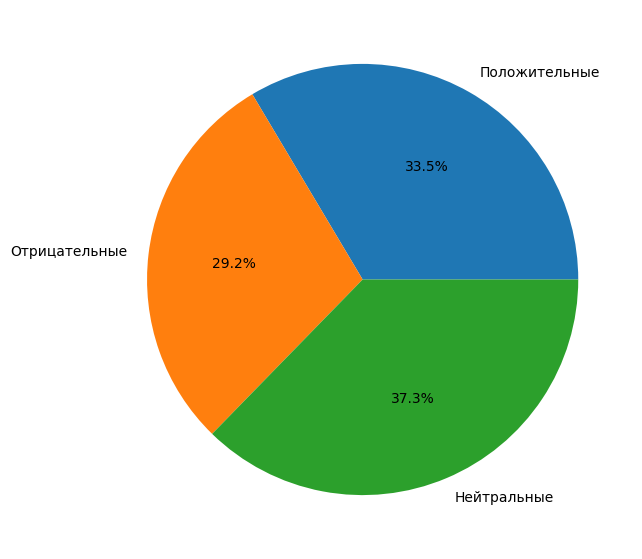

In [7]:
# Создадим визуализацию
# Будем работать с библиотекой matplotlip
# Numpy - библиотека для обработки массивов данных - обеспечивает работу matplotlib
from matplotlib import pyplot as plt
import numpy as np

# Задаем список меток
labels = ['Положительные', 'Отрицательные', 'Нейтральные']

# Задаем значения для каждой метки, процентное соотношение (только для обучающей выборки)
positive_train_percentage = (positive_train / total_train) * 100
negative_train_percentage = (negative_train / total_train) * 100
neutral_train_percentage = (neutral_train / total_train) * 100

data = [positive_train_percentage, negative_train_percentage, neutral_train_percentage]

# Код для отрисовки круговой диаграммы
fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels, autopct='%1.1f%%') # autopct создает числовые подписи и использует форматирование с двумя знаками после запятой

# Показать график
plt.show()


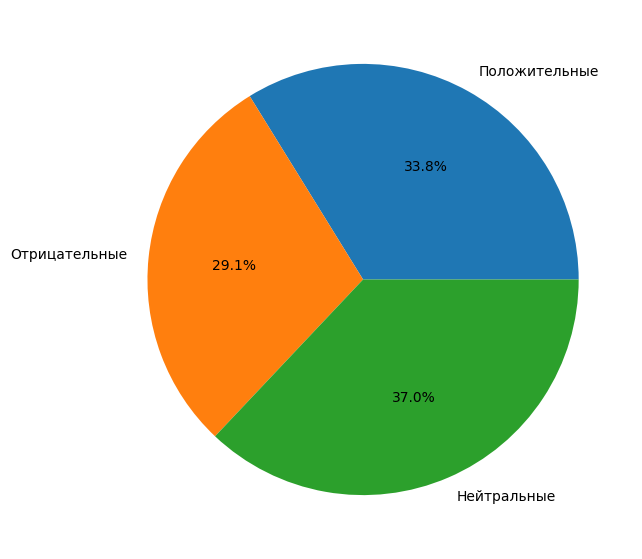

In [8]:
# Сделаем то же самое для проверочной выборки
from matplotlib import pyplot as plt
import numpy as np

labels = ['Положительные', 'Отрицательные', 'Нейтральные']

positive_validation_percentage = (positive_validation / total_validation) * 100
negative_validation_percentage = (negative_validation / total_validation) * 100
neutral_validation_percentage = (neutral_validation / total_validation) * 100

data1 = [positive_validation_percentage, negative_validation_percentage, neutral_validation_percentage]

fig = plt.figure(figsize=(10, 7))
plt.pie(data1, labels=labels, autopct='%1.1f%%')

plt.show()

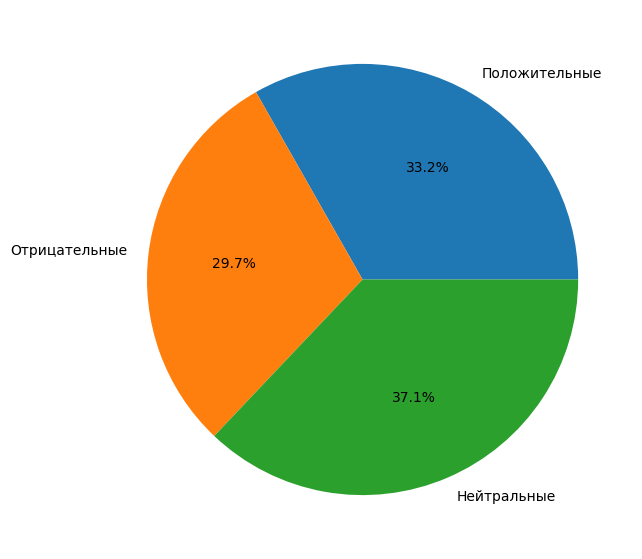

In [9]:
# Сделаем то же самое для тестовой выборки
from matplotlib import pyplot as plt
import numpy as np

labels = ['Положительные', 'Отрицательные', 'Нейтральные']

total_test = positive_test + negative_test + neutral_test
positive_test_percentage = (positive_test / total_test) * 100
negative_test_percentage = (negative_test / total_test) * 100
neutral_test_percentage = (neutral_test / total_test) * 100

data2 = [positive_test_percentage, negative_test_percentage, neutral_test_percentage]

fig = plt.figure(figsize=(10, 7))
plt.pie(data2, labels=labels, autopct='%1.1f%%')

plt.show()

# Задание 2

In [10]:
# Загрузка spaCy
import spacy

# Загрузка библиотеки для визуализации spaCy
from spacy import displacy

# Инициализация инструментов SpaCy для английского (для каждого языка загружается свой вариант)
nlp = spacy.load('en_core_web_sm')

# Выведем доступные инструменты
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [11]:
# Образец текста из нашего датасета
sample = dataset['train'][0]['text']
sample

'Cooking microwave pizzas, yummy'

In [12]:
# Для работы со SpaCy, _нужно_ привести все к нужному виду
# Для этого загружаем в nlp наш текст
doc = nlp(sample)
doc # Визуально ничего не изменилось, но теперь это объект класса SpaCy, который можно обработать инструментами NLP

Cooking microwave pizzas, yummy

In [13]:
# Токенизация
for token in doc:
    print(token.text)

Cooking
microwave
pizzas
,
yummy


In [ ]:
# Частересная разметка
for token in doc:
    print(token.pos_)

NOUN
NOUN
NOUN
PUNCT
ADJ


In [ ]:
# Лемматизация
for token in doc:
    print(token.lemma_)

cooking
microwave
pizza
,
yummy


In [ ]:
# Синтаксическая роль (составляющие)
for token in doc:
    print(token.tag_)


NN
NN
NNS
,
JJ


In [ ]:
# Синтаксическая роль (зависимости)
for token in doc:
    print(token.dep_)

compound
compound
ROOT
punct
amod


In [ ]:
# Морфологическая разметка
for token in doc:
    print(token.morph)

Number=Sing
Number=Sing
Number=Plur
PunctType=Comm
Degree=Pos


In [29]:
# Загрузка spaCy
import spacy
from spacy import displacy

# Инициализация инструментов SpaCy для английского
nlp = spacy.load('en_core_web_sm')

# Сохранение текстов из тестовой выборки в отдельную переменную
test_texts = dataset['test'][:5]['text']  # Для примера берем первые 5 текстов
print(test_texts)

['getting cds ready for tour', ' MC, happy mother`s day to your mom ;).. love yah', 'A year from now is graduation....i am pretty sure i`m not ready for it!?!?!?', ' because you had chips and sale w/o me', 'Great for organising my work life balance']


In [33]:
# Создание списка токенов для каждого текста с помощью SpaCy
tokenized_texts = []
for text in test_texts:
  for token in nlp(text):
    tokenized_texts.append(token.text)
print(tokenized_texts)

['getting', 'cds', 'ready', 'for', 'tour', ' ', 'MC', ',', 'happy', 'mother`s', 'day', 'to', 'your', 'mom', ';)', '..', 'love', 'yah', 'A', 'year', 'from', 'now', 'is', 'graduation', '....', 'i', 'am', 'pretty', 'sure', 'i`m', 'not', 'ready', 'for', 'it', '!', '?', '!', '?', '!', '?', ' ', 'because', 'you', 'had', 'chips', 'and', 'sale', 'w/o', 'me', 'Great', 'for', 'organising', 'my', 'work', 'life', 'balance']


In [38]:
# Частеречная разметка: создаем список частей речи для каждого токена
speech_parts = []
for text in tokenized_texts:
  for token in nlp(text):
    speech_parts.append(token.pos_)
print(speech_parts)

['VERB', 'NOUN', 'ADJ', 'ADP', 'VERB', 'SPACE', 'PROPN', 'PUNCT', 'ADJ', 'PROPN', 'NOUN', 'PART', 'PRON', 'NOUN', 'PUNCT', 'PUNCT', 'NOUN', 'NOUN', 'PRON', 'NOUN', 'ADP', 'ADV', 'AUX', 'NOUN', 'PUNCT', 'PRON', 'AUX', 'ADV', 'ADV', 'PROPN', 'PART', 'ADJ', 'ADP', 'PRON', 'PUNCT', 'PUNCT', 'PUNCT', 'PUNCT', 'PUNCT', 'PUNCT', 'SPACE', 'SCONJ', 'PRON', 'VERB', 'NOUN', 'CCONJ', 'NOUN', 'ADP', 'PRON', 'ADJ', 'ADP', 'VERB', 'PRON', 'NOUN', 'NOUN', 'NOUN']


In [50]:
# Проверим точность разметки. С помощью range выведем для первых пяти текстов пары "слово - его частеречный тег".
for i in range(len(tokenized_texts[:5])):
    print(f"Текст {i}")
    for token, pos in zip(tokenized_texts, speech_parts):
        print(f"{token} - {pos}")

Текст 0
getting - VERB
cds - NOUN
ready - ADJ
for - ADP
tour - VERB
  - SPACE
MC - PROPN
, - PUNCT
happy - ADJ
mother`s - PROPN
day - NOUN
to - PART
your - PRON
mom - NOUN
;) - PUNCT
.. - PUNCT
love - NOUN
yah - NOUN
A - PRON
year - NOUN
from - ADP
now - ADV
is - AUX
graduation - NOUN
.... - PUNCT
i - PRON
am - AUX
pretty - ADV
sure - ADV
i`m - PROPN
not - PART
ready - ADJ
for - ADP
it - PRON
! - PUNCT
? - PUNCT
! - PUNCT
? - PUNCT
! - PUNCT
? - PUNCT
  - SPACE
because - SCONJ
you - PRON
had - VERB
chips - NOUN
and - CCONJ
sale - NOUN
w/o - ADP
me - PRON
Great - ADJ
for - ADP
organising - VERB
my - PRON
work - NOUN
life - NOUN
balance - NOUN
Текст 1
getting - VERB
cds - NOUN
ready - ADJ
for - ADP
tour - VERB
  - SPACE
MC - PROPN
, - PUNCT
happy - ADJ
mother`s - PROPN
day - NOUN
to - PART
your - PRON
mom - NOUN
;) - PUNCT
.. - PUNCT
love - NOUN
yah - NOUN
A - PRON
year - NOUN
from - ADP
now - ADV
is - AUX
graduation - NOUN
.... - PUNCT
i - PRON
am - AUX
pretty - ADV
sure - ADV
i`m - PRO

In [57]:
# Разметка именованных сущностей
for i in range(7, 20):
    doc = nlp(dataset['test'][i]['text'])
    print([(ent.text, ent.label_) for ent in doc.ents])

[('1st', 'ORDINAL'), ('2890', 'CARDINAL')]
[('first', 'ORDINAL')]
[('today', 'DATE'), ('i`m', 'NORP')]
[]
[('Audi', 'ORG')]
[]
[('REALLY', 'GPE')]
[('i`m', 'NORP')]
[]
[]
[('TY', 'ORG')]
[('recent years', 'DATE')]
[]


In [60]:
# Выберите любой текст и визуализируйте его разметку именованных сущностей

displacy.render(nlp(dataset['train'][70]['text']), style="ent", jupyter=True)